In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


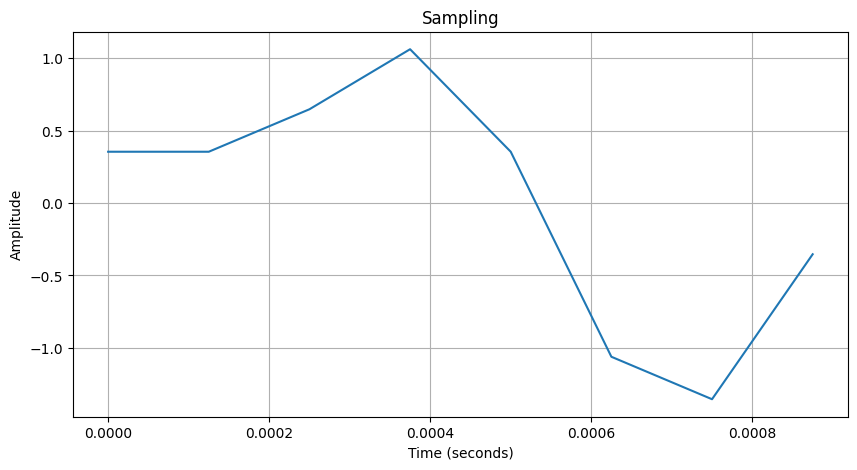

In [54]:
frequency1 = 1000
amplitude1 = 1
phase_shift1 = 0
frequency2 = 2000
amplitude2 = .5
phase_shift2 = (3*np.pi) / 4
start_time = 0
end_time = .001
sample_rate = 8000
N = 8

sample_count = sample_rate * (end_time - start_time)

t = np.linspace(start_time, end_time, int(sample_count), endpoint=False)

x = amplitude1 * np.sin(2 * np.pi * frequency1 * t + phase_shift1) + amplitude2 * np.sin(2 * np.pi * frequency2 * t + phase_shift2)
plt.figure(figsize=(10, 5))
plt.plot(t, x)
#plt.stem(t, x)
plt.title('Sampling')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

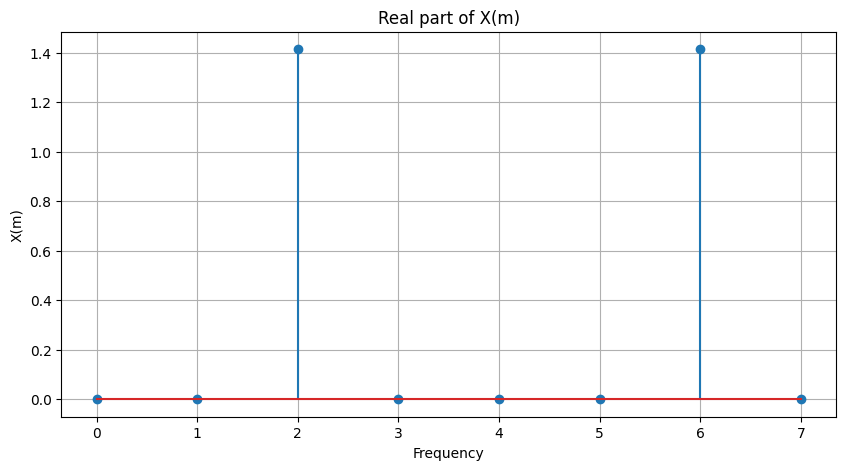

In [55]:
X_real = []
for i in range(0,N):
    real = 0
    for n in range(0,N):
        real = real + x[n] * np.cos((2 * np.pi * i * n) / N)
    X_real.append(round(real,3))

plt.figure(figsize=(10, 5))
plt.stem(range(0,8), X_real)
plt.title('Real part of X(m)')
plt.xlabel('Frequency')
plt.ylabel('X(m)')
plt.grid(True)
plt.show()

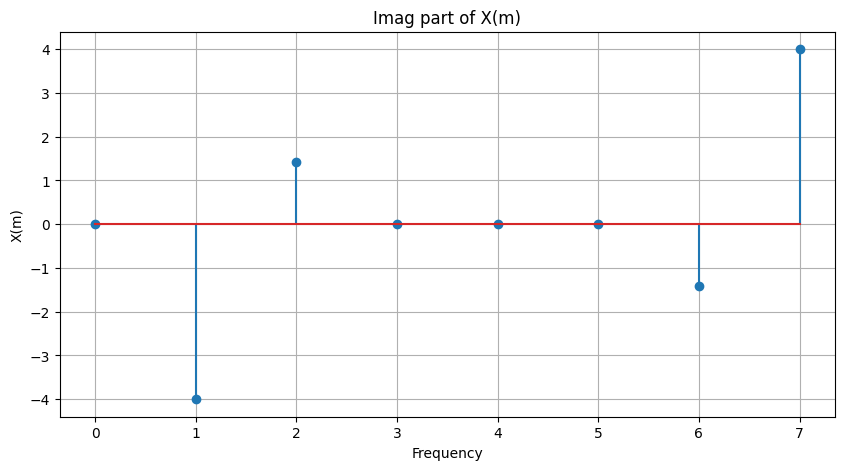

In [56]:
X_img = []
for i in range(0,N):
    img = 0
    for n in range(0,N):
        img = img - x[n] * np.sin((2 * np.pi * i * n) / N)
    X_img.append(round(img,3))

plt.figure(figsize=(10, 5))
plt.stem(range(0,8), X_img)
plt.title('Imag part of X(m)')
plt.xlabel('Frequency')
plt.ylabel('X(m)')
plt.grid(True)
plt.show()

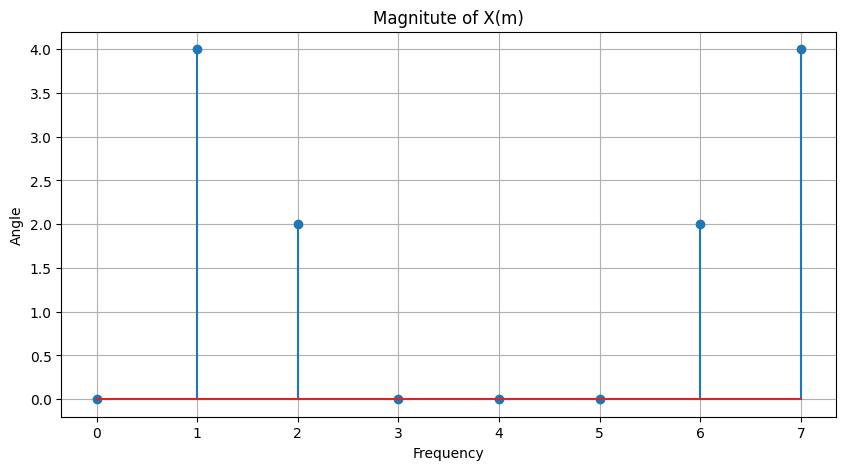

In [57]:
magnitude = []  
for i in range(0,N):
    magnitude.append(math.sqrt(X_real[i]*X_real[i] + X_img[i]*X_img[i]))
    
plt.figure(figsize=(10, 5))
plt.stem(range(0,8), magnitude)
plt.title('Magnitute of X(m)')
plt.xlabel('Frequency')
plt.ylabel('Angle')
plt.grid(True)
plt.show()

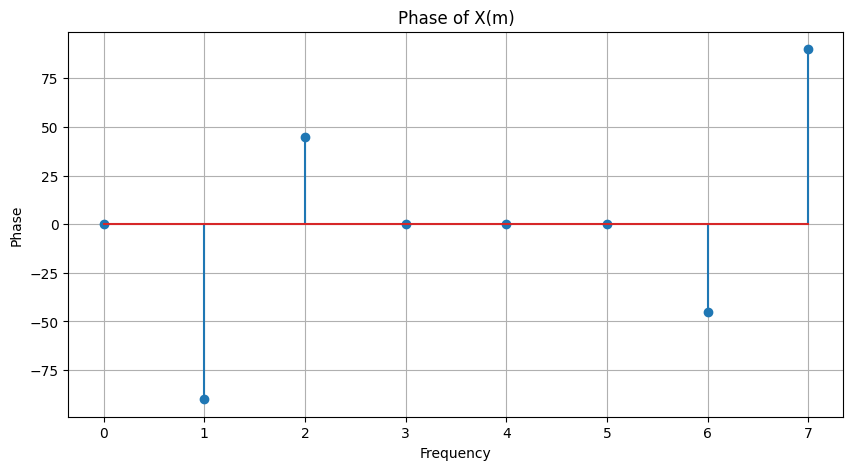

In [58]:
phase = []  
for i in range(0,N):
    if X_real[i] != 0:
        phase.append(math.degrees(np.arctan(X_img[i] / X_real[i])))
    else:
        if X_img[i]<0:
            phase.append(-90)
        elif X_img[i]>0:
            phase.append(90)
        else:
            phase.append(0)
    
plt.figure(figsize=(10, 5))
plt.stem(range(N), phase)
plt.title('Phase of X(m)')
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.grid(True)
plt.show()


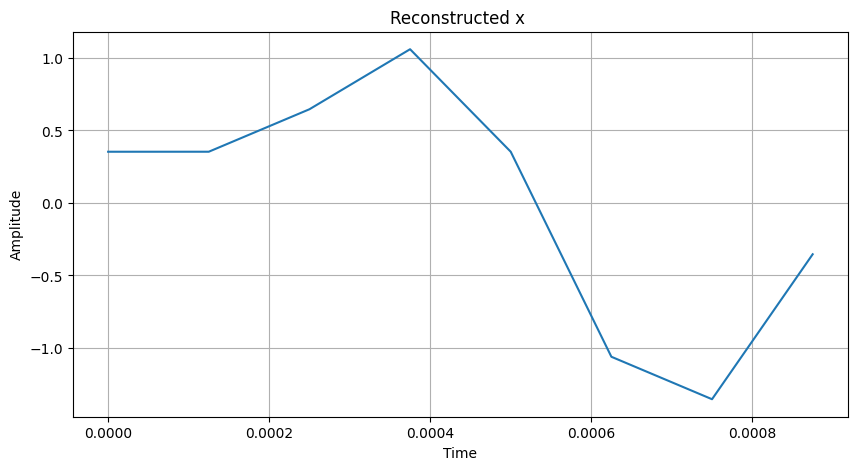

In [59]:
reconstructed_x = []  
for n in range(N):
    temp = 0
    for m in range(N):
        temp = temp + X_real[m] * np.cos((2 * np.pi * m * n) / N) - X_img[m] * np.sin((2 * np.pi * m * n) / N)
    reconstructed_x.append(temp/N)
    
plt.figure(figsize=(10, 5))
plt.plot(t, reconstructed_x)
plt.title('Reconstructed x ')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

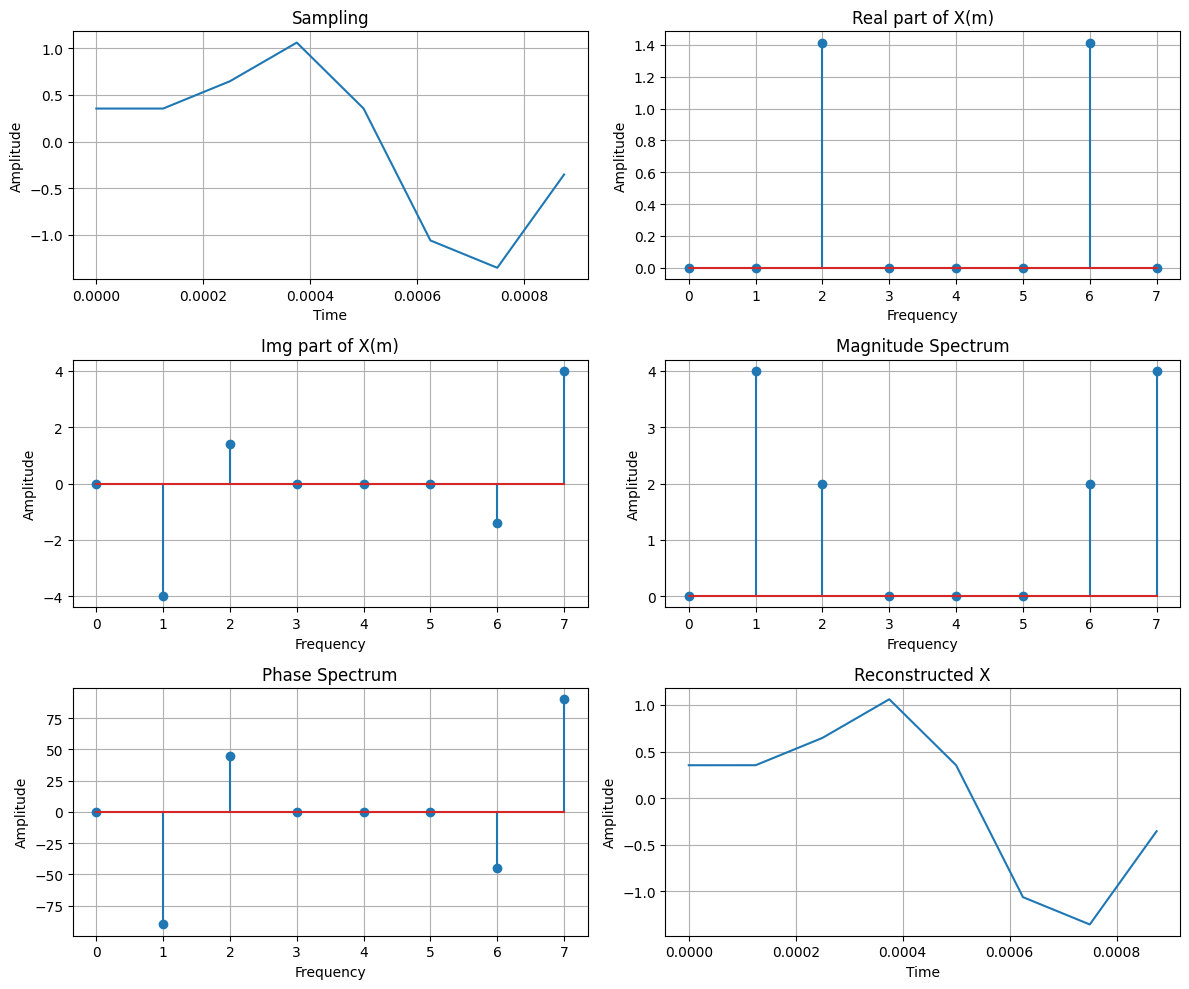

In [60]:
plt.figure(figsize = (12,10))

plt.subplot(3,2,1)
plt.plot(t,x)
plt.title("Sampling")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.grid()

plt.subplot(3,2,2)
plt.stem(range(N),X_real)
plt.title("Real part of X(m)")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
plt.grid()

plt.subplot(3,2,3)
plt.stem(range(N),X_img)
plt.title("Img part of X(m)")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
plt.grid()

plt.subplot(3,2,4)
plt.stem(range(N),magnitude)
plt.title("Magnitude Spectrum")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
plt.grid()

plt.subplot(3,2,5)
plt.stem(range(N),phase)
plt.title("Phase Spectrum")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
plt.grid()

plt.subplot(3,2,6)
plt.plot(t,reconstructed_x)
plt.title("Reconstructed X")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.grid()

plt.tight_layout()
plt.show()
